In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# load data
df = pd.read_excel("Book1.xlsx")
df

,variety,days,treatment,Stem,Leaf,Hypocotyl
0,Var 1,Day7,T1,0.021,0.022,0.008
1,Var 1,Day7,T2,0.036,0.033,0.009
2,Var 1,Day7,T3,0.024,0.015,0.010
3,Var 1,Day14,T1,0.200,0.130,0.100
4,Var 1,Day14,T2,0.200,0.170,0.120
5,Var 1,Day14,T3,0.220,0.220,0.130
6,Var 1,Day28,T1,0.840,0.330,0.390
7,Var 1,Day28,T2,0.320,0.300,0.240
8,Var 1,Day28,T3,0.700,0.480,0.450
9,Var 2,Day7,T1,0.019,0.023,0.009


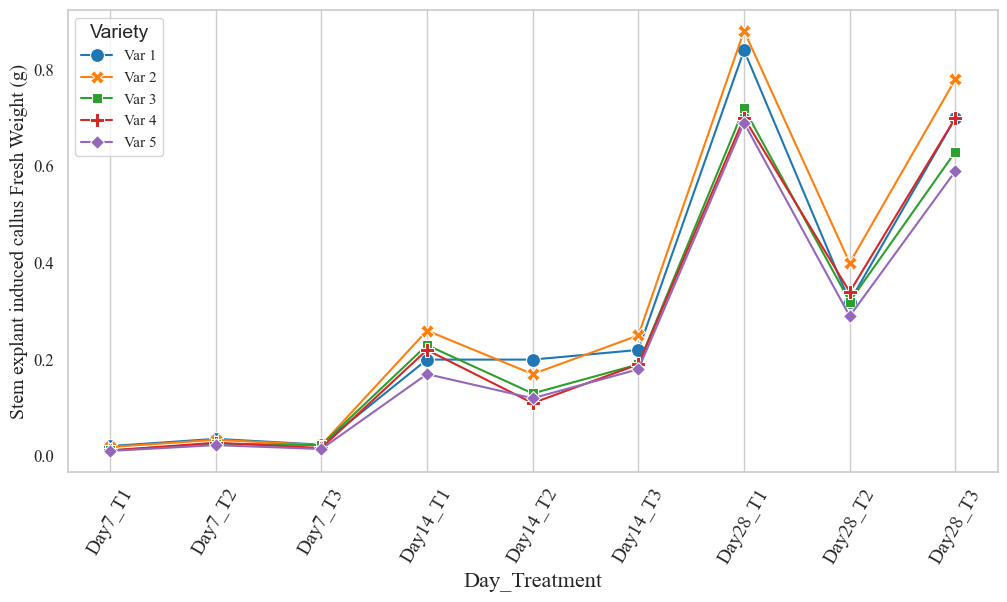

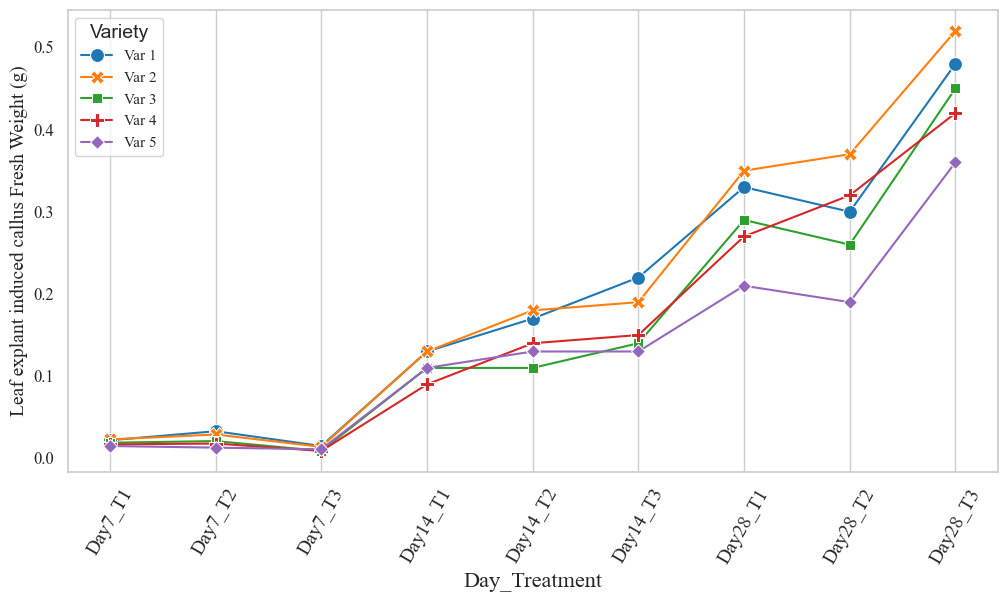

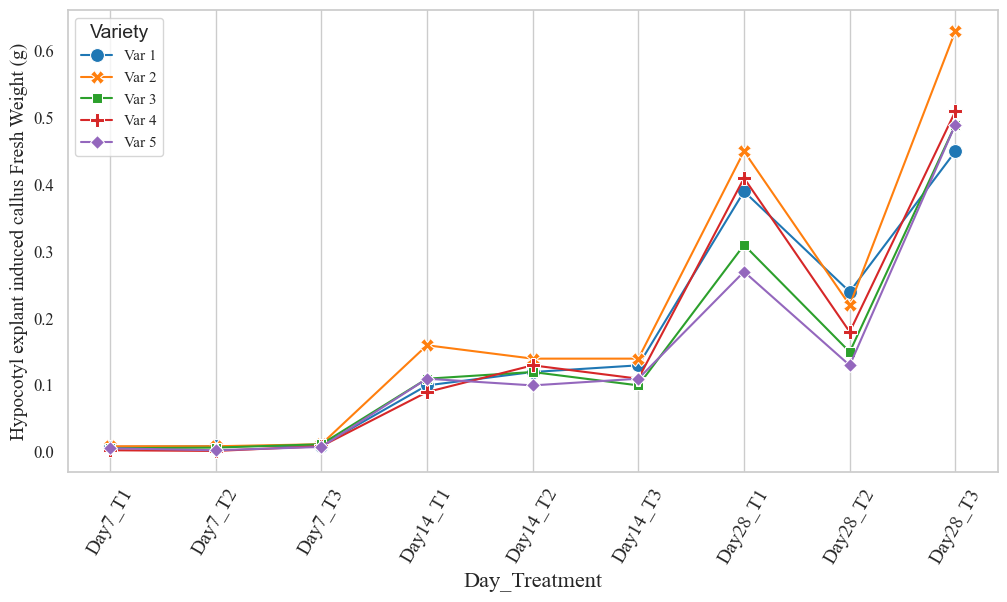

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine days and treatments into a single column for the x-axis
df['day_treatment'] = df['days'] + '_' + df['treatment']

# Function to plot data with treatments and variety using Seaborn
def plot_data(data, x_col, y_col, title, filename):
    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")
    
    # Plotting with Seaborn
    sns.lineplot(data=data, x=x_col, y=y_col, hue='variety', style='variety', markers=True, dashes=False, 
                 markersize=10, palette='tab10')
    
    # plt.title(title, fontsize=20, fontname='Times New Roman')
    plt.xlabel('Day_Treatment', fontsize=16, fontname='Times New Roman')
    plt.ylabel(f'{y_col} explant induced callus Fresh Weight (g)', fontsize=14, fontname='Times New Roman')  # Corrected y-axis label
    plt.xticks(rotation=60, fontsize=14, fontname='Times New Roman')
    plt.yticks(fontsize=12, fontname='Times New Roman')
    plt.legend(title='Variety', fontsize=12, title_fontsize=14, loc='best', prop={'family': 'Times New Roman'})
    plt.grid(axis='y')
    
    # Save the plot
    plt.savefig(filename, bbox_inches='tight', dpi=300)  # Save with 300 DPI
    plt.show()

# Columns to plot
columns_to_plot = [
    ('Stem', 'Stem Fresh Weight over Days and Treatments'),
    ('Leaf', 'Leaf Fresh Weight over Days and Treatments'),
    ('Hypocotyl', 'Hypocotyl Fresh Weight over Days and Treatments')
]

# Plot the data using a for loop and save the plots
for y_col, title in columns_to_plot:
    filename = f"{y_col}.png"
    plot_data(df, 'day_treatment', y_col, title, filename)